## **Problem Definition**

### **The Context:**

- There is a market for used cars. People prefer to buy used cars over new cars. Cars4U is tech start up entering this market. Historically used cars sale has grown over year to year.    

### **The objective:**

-  Come up with pricing model which can help Cars4U to grow and achieve profitablity. 

### **The key questions:**

-  What are the key features which impact the pricing model ? 
-  Does car manufacturing year impact the pricing model ? relatively new used cars get higher price ? 

### **The problem formulation**:

- Identity pattern across features like mileage, seats, kilometer driven how it affects the pricing model 
- Identify right model to correctly predict the price of used car 

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [87]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libaries to split the data, preprocessing and Linear regression 
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



### **Let us load the data**

In [88]:
# load the data from csv
data = pd.read_csv('used_cars.csv')

## Data Overview

- Observations
- Sanity checks

In [89]:
# First 5 rows of the data 
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [90]:
# last 5 rows of the data 
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [91]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [92]:
# Check for any null values 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [93]:
# Check for any duplicate rows 
data.duplicated().sum()

0

### ***Observations*** ###
 
1. Overall there are 7253 entries in the data with 14 columns 
2. There are data missing in few columns 
3. S.No. column doesnt provide any additional benefits since its acting as index column 
4. There are no duplicates in the data 
5. ***Categorical variables - Location, Year, Fuel_Type, Transmission, Owner_Type, Seats***
6. ***Numerical variables -  Kilometers_Driven, Mileage, Engine, Power***

***Price is the target variable***

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [94]:
# summary stats
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0


In [95]:
## Categorical variables 
categorical_variables=['Location','Fuel_Type','Transmission','Owner_Type']
for x in categorical_variables:
    print("Breakdown by category ===>",x)
    print(data[x].value_counts())

Breakdown by category ===> Location
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Breakdown by category ===> Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Breakdown by category ===> Transmission
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
Breakdown by category ===> Owner_Type
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64


In [96]:
# Drop Sr no column 
data.drop('S.No.',axis=1, inplace=True)

In [97]:
# Based on summary stats kilometers_driven - max value for a car driven doesnt look right 
print("Max Kilometers_Driven ==> ", data['Kilometers_Driven'].max())
print("Min Kilometers_Driven ==> ", data['Kilometers_Driven'].min())
print("p99 of Kilometers_Driven ", data['Kilometers_Driven'].quantile(0.99))

Max Kilometers_Driven ==>  6500000
Min Kilometers_Driven ==>  171
p99 of Kilometers_Driven  173479.99999999956


In [98]:
# Dropping data which is more than p99 for kilometers_driven
data.drop(data[data['Kilometers_Driven'] > data['Kilometers_Driven'].quantile(0.99)].index, inplace=True)

In [99]:
# Based on summary stats mileage for car cannot be zero
print("Min Mileage ==> ", data['Mileage'].min())
data.drop(data[data['Mileage'] == data['Mileage'].min()].index, inplace=True)

Min Mileage ==>  0.0


In [100]:
# Post data clean up for unrealistic values 
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7102,1994,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7102,11,Mumbai,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7102.0,NaN,NaN,NaN,2013.439172,3.188382,1996.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,7102.0,NaN,NaN,NaN,55854.742044,30631.471195,171.0,33552.5,52950.5,72006.0,173000.0
Fuel_Type,7102,5,Diesel,3761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7102,2,Manual,5087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7102,4,First,5853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7100.0,NaN,NaN,NaN,18.373182,4.148653,6.4,15.4,18.3,21.1,33.54
Engine,7069.0,NaN,NaN,NaN,1611.381242,591.384385,72.0,1198.0,1493.0,1968.0,5998.0
Power,6974.0,NaN,NaN,NaN,112.695475,53.578142,34.2,75.0,93.85,138.1,616.0


### ***Observations / Insights*** ### 

1. Name has lot of unique values which wont help in model building 
2. Location has 11 unqiue values with Mumbai with highest car sold or available
3. **We had to take 99% percentile of kiometers driven as there were lot of outliers wrt numbers in this particular column** 
4. **We also had to clean up minimum mileage as there values with zero** 


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

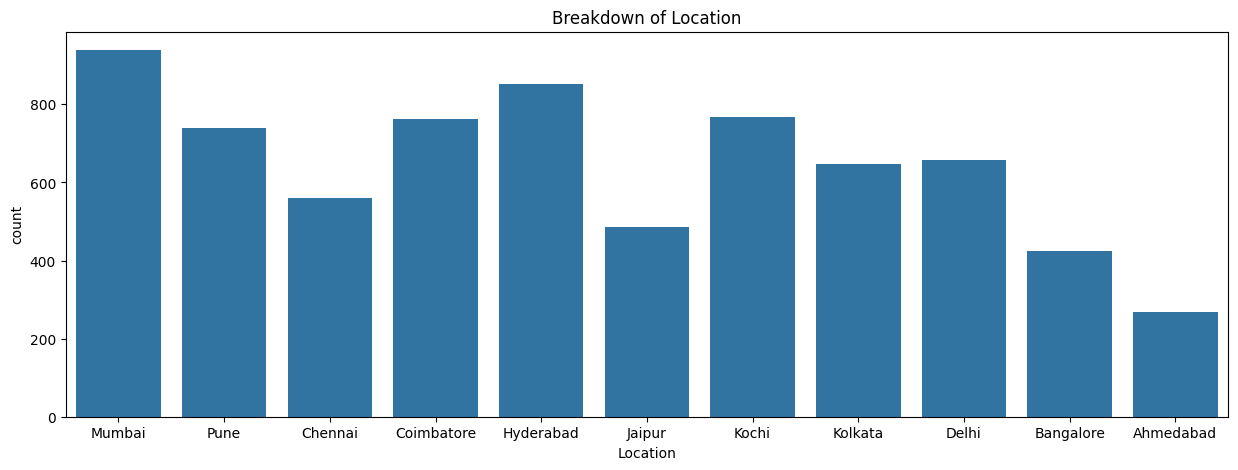

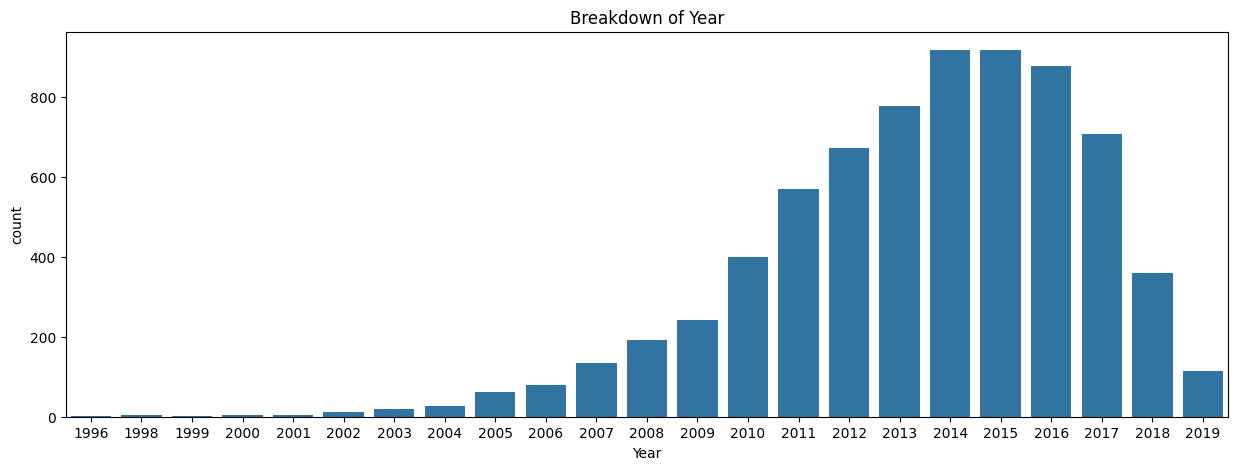

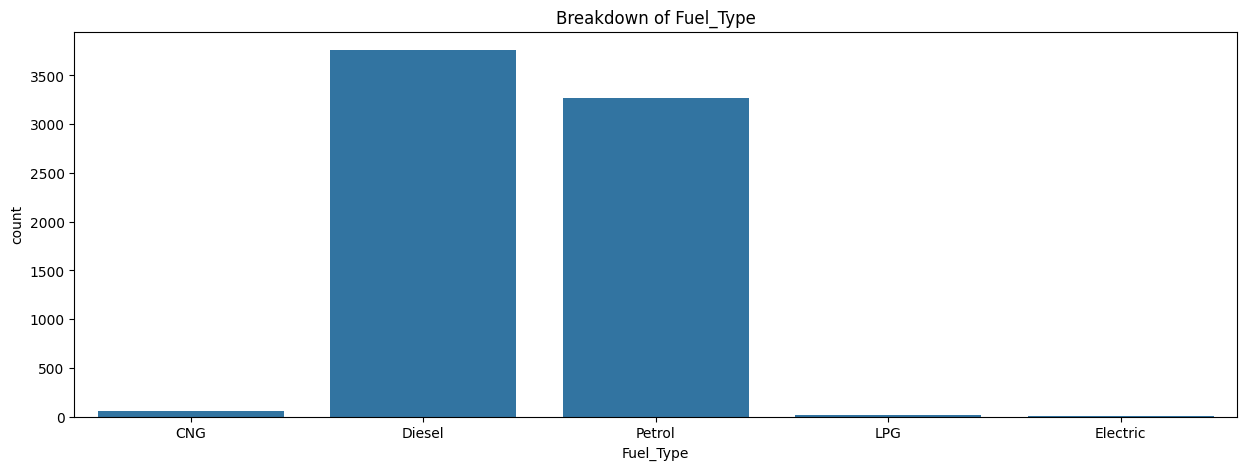

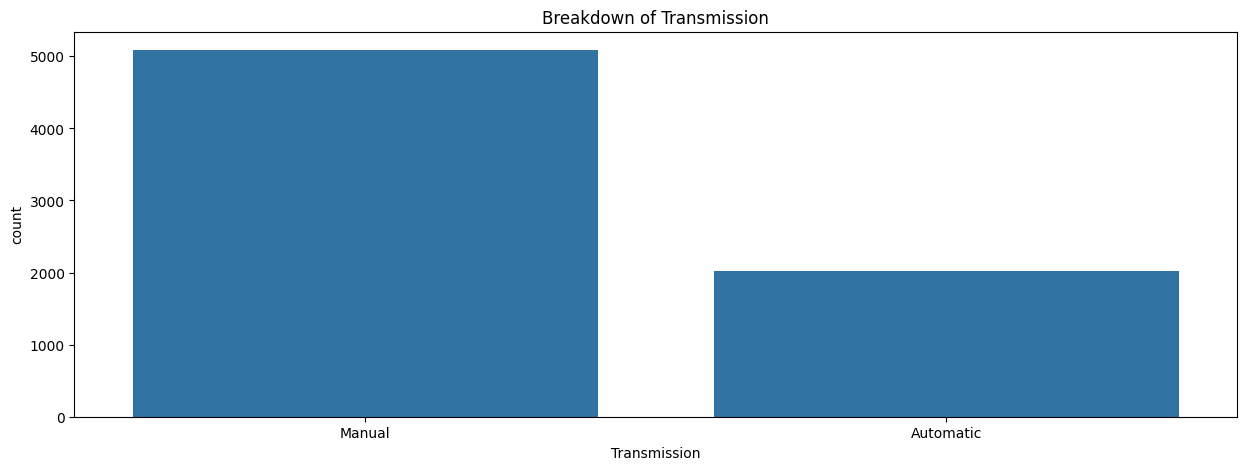

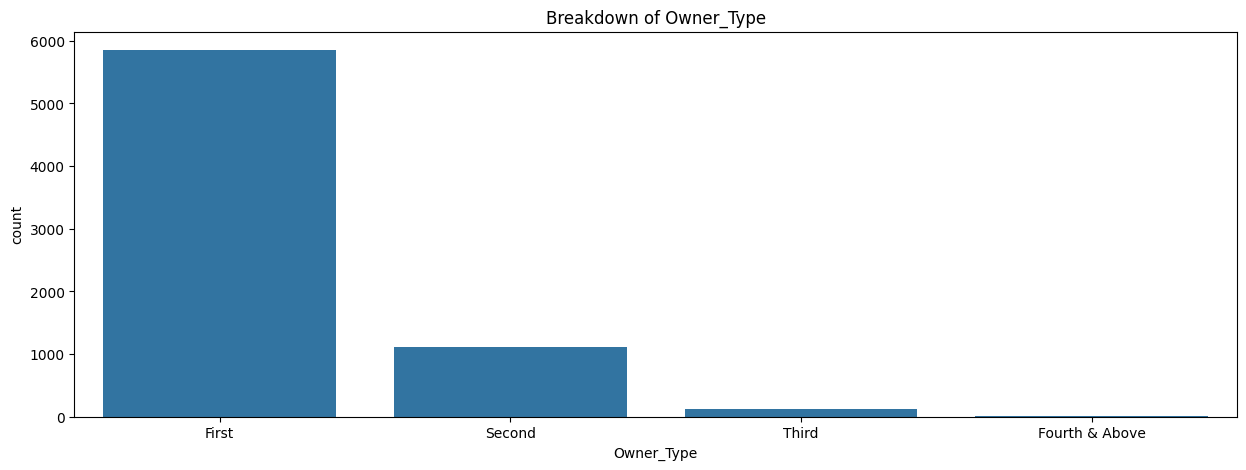

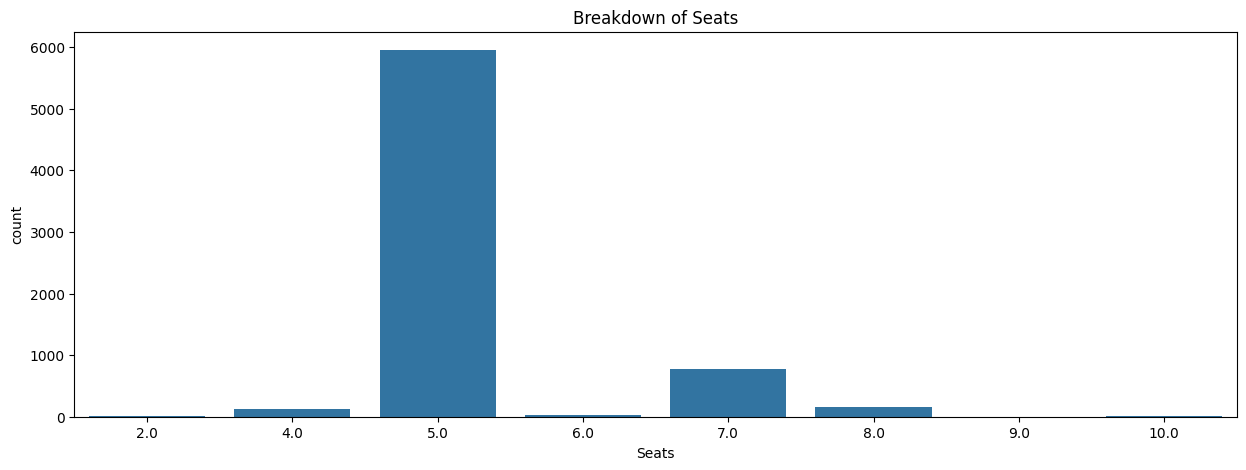

In [101]:
# Count plot for all categorical variables 
categorical_variables = ['Location','Year','Fuel_Type','Transmission','Owner_Type','Seats']
for col in categorical_variables:
    plt.figure(figsize=(15,5))
    sns.countplot(x=col, data=data)
    plt.title(f'Breakdown of {col}')
    plt.show()

### ***Observations / Insights*** ### 

- Mumbai location has more cars sold/available 
- 2014 year had more car sales 
- Diesel & Petrol cars form majority of used cars 
- Manual transmission is highest 
- First owners are high 
- Five seater is most popular 

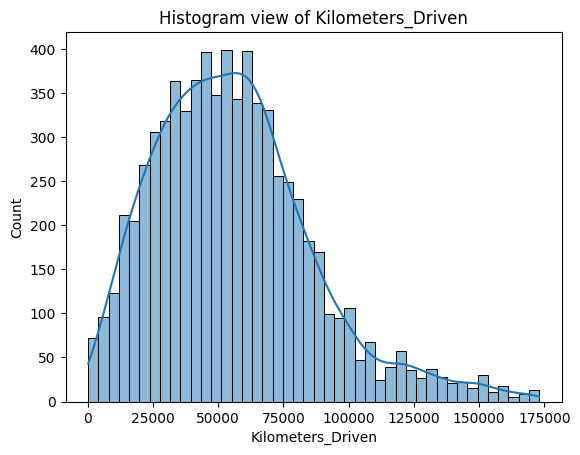

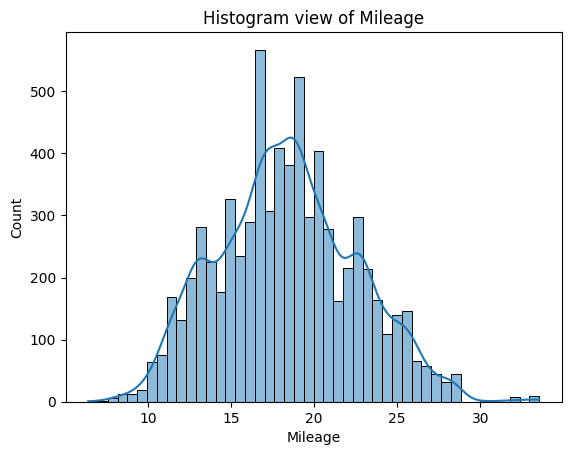

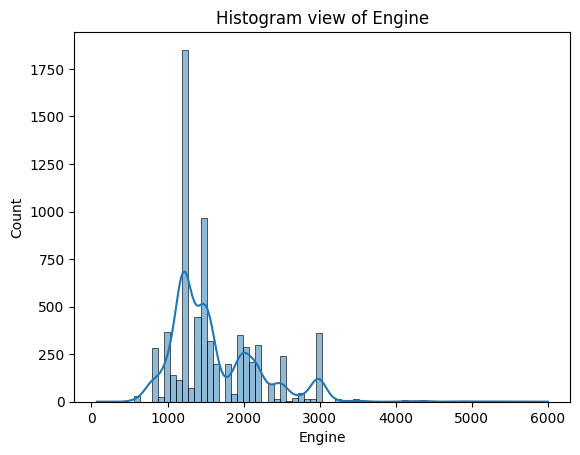

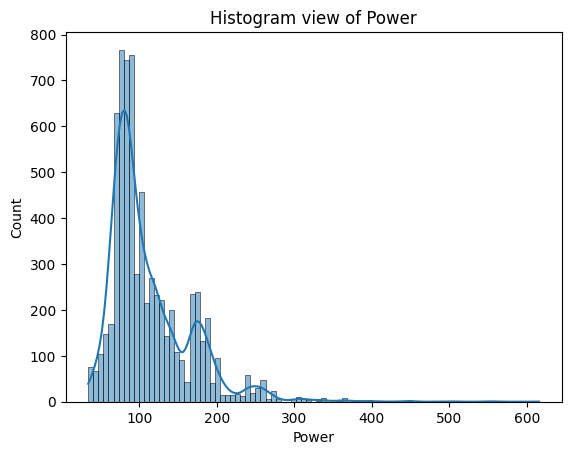

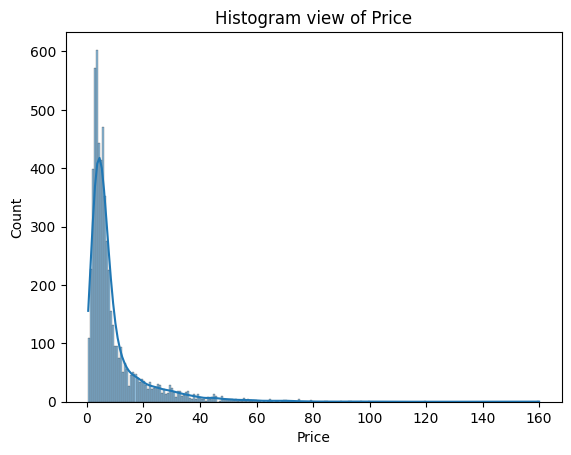

In [102]:
# Histogram plot for all numerical variables 
numerical_variables=['Kilometers_Driven','Mileage','Engine','Power','Price']
for col in numerical_variables:
    plt.title(f"Histogram view of {col}")
    sns.histplot(x=col,kde=True,data=data)
    plt.show()

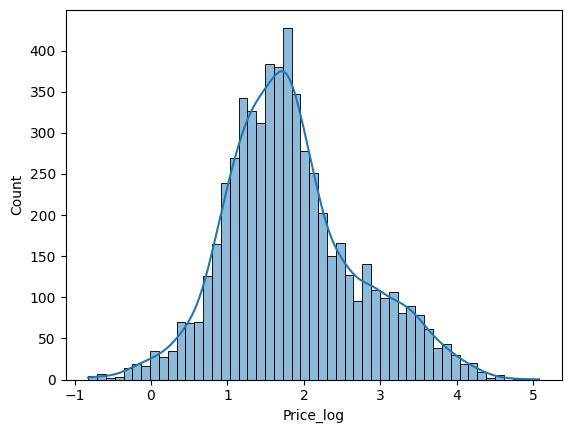

In [103]:
# Price data is skewed Applying log transformation 
data['Price_log'] = np.log(data["Price"])
sns.histplot(x='Price_log',kde=True,data=data)
plt.show()

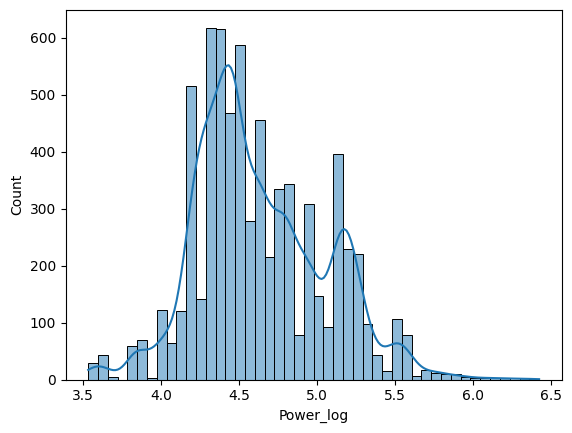

In [104]:
# Power is skewed applying log transformation 
data['Power_log'] = np.log(data["Power"])
sns.histplot(x='Power_log',kde=True,data=data)
plt.show()

### ***Observations / Insights*** ###   

1. Price & Power data is skewed applying log transformation 
2. Kilometer_driven is slightly right skewed not applying any transformation 

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

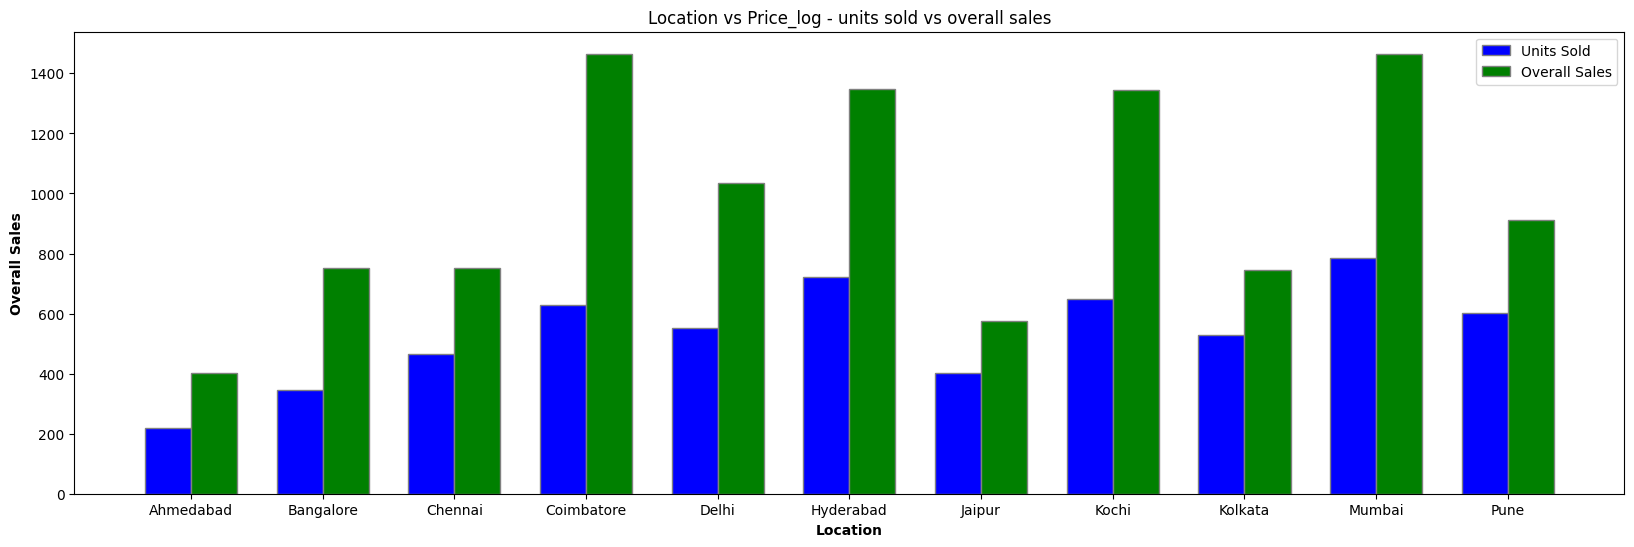

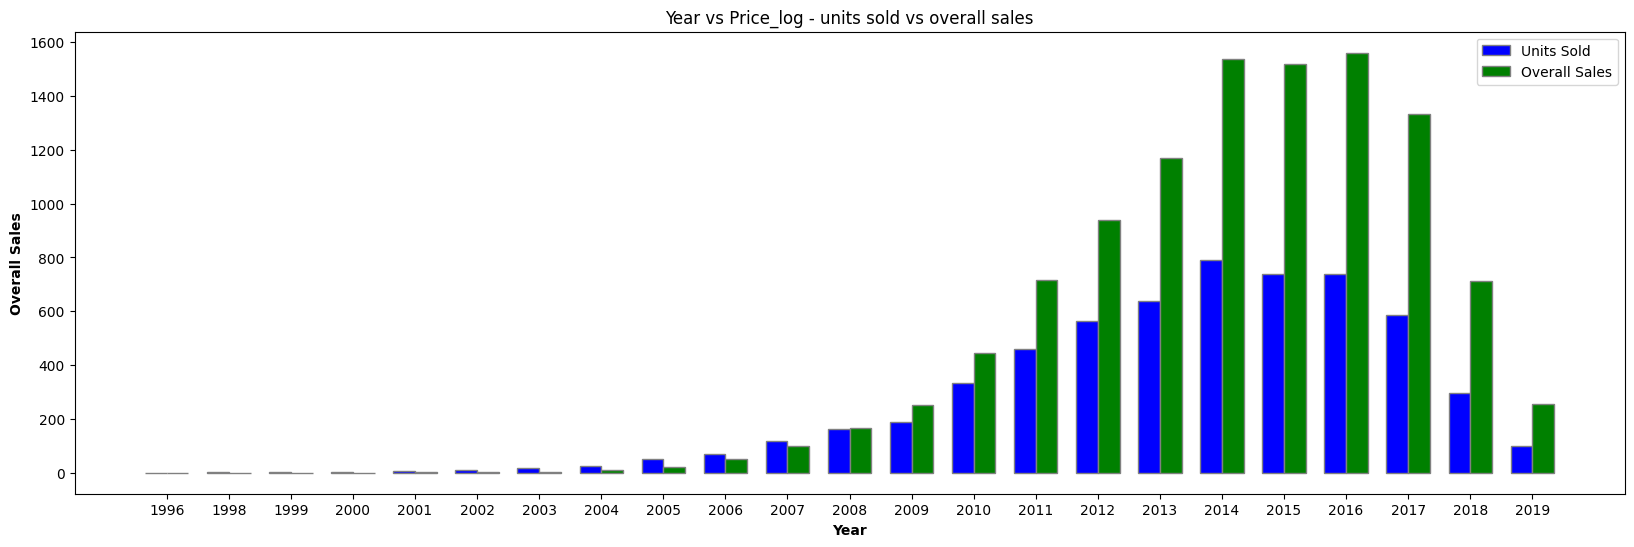

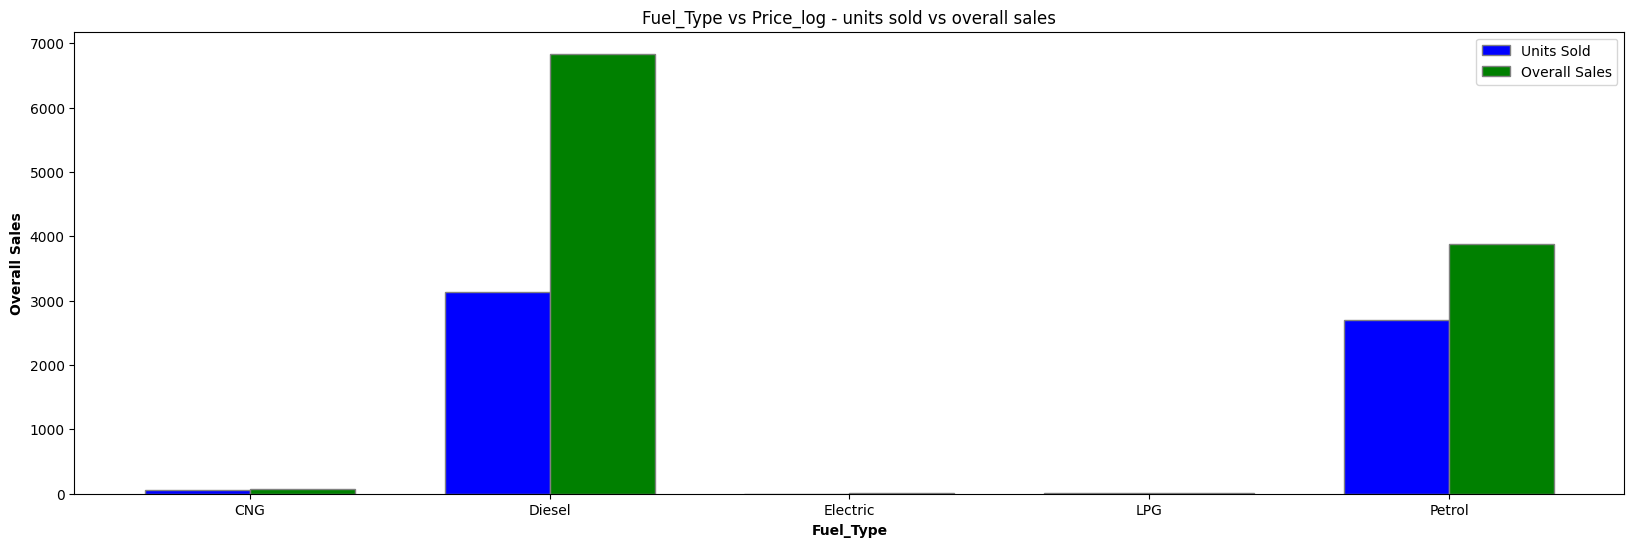

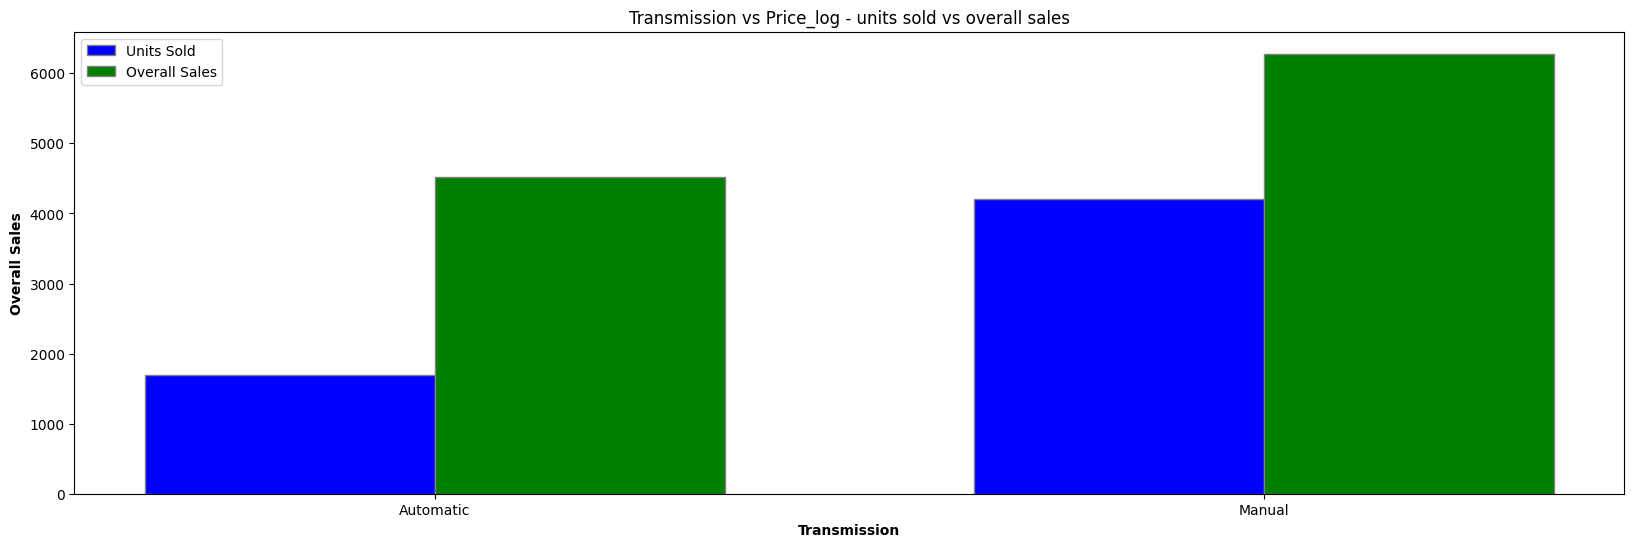

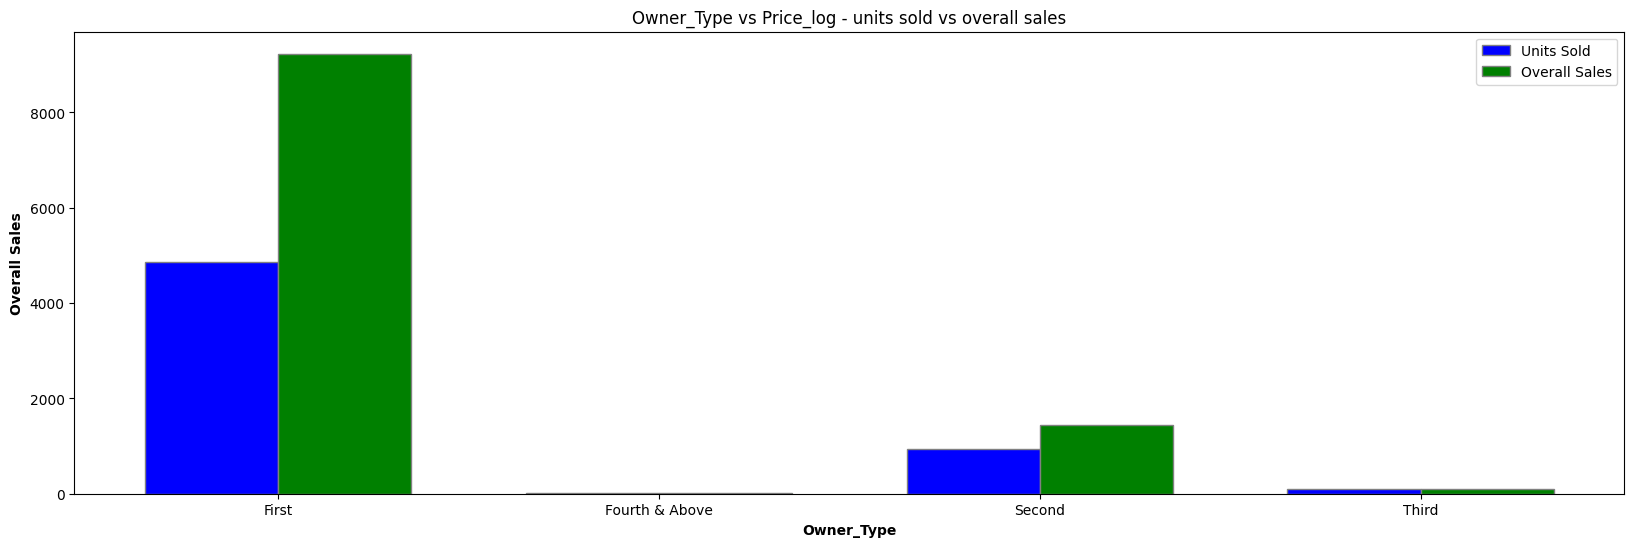

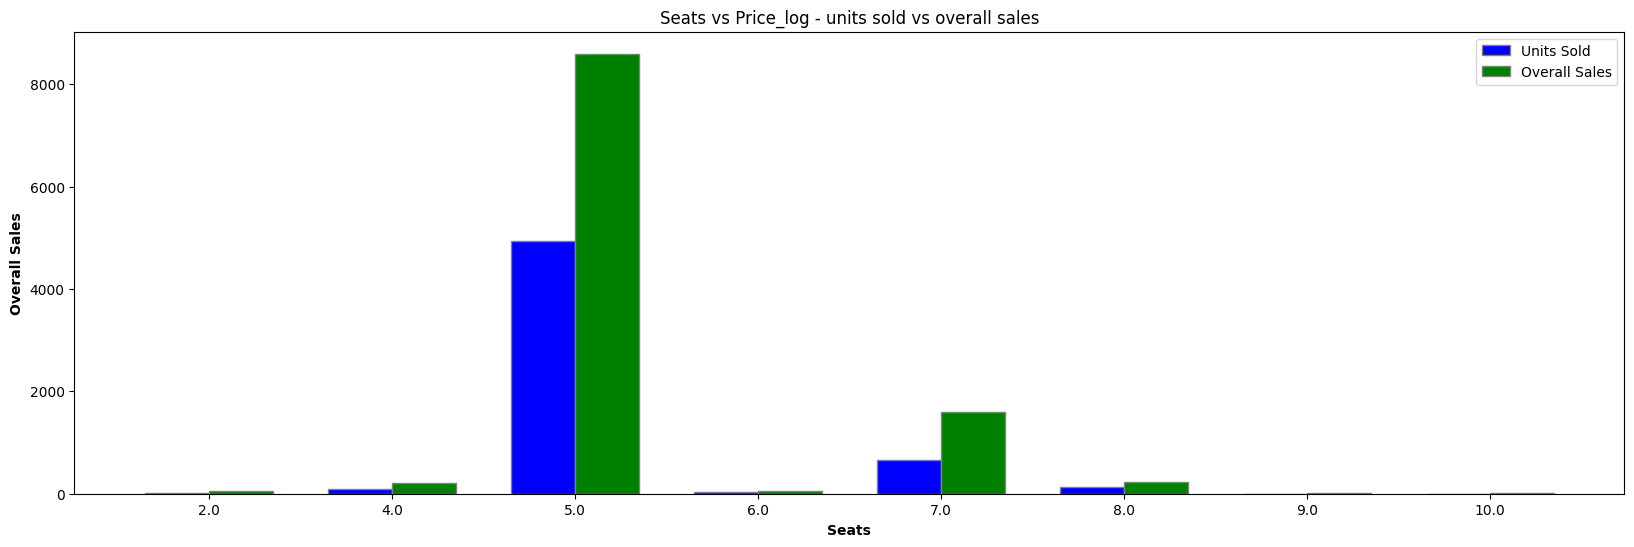

In [105]:
# Categorical variables vs Price log Comparison 
for col in categorical_variables:
    col_summary = data.groupby(col).agg(
        units_sold=('Price_log', 'count'),        
        overall_sales=('Price_log', 'sum')       
    ).reset_index()
    col_data = pd.DataFrame(col_summary)
    # Set the width of the bars
    bar_width = 0.35
    r1 = np.arange(len(col_data[col]))
    r2 = [x + bar_width for x in r1]
    # Create grouped bar plot
    plt.figure(figsize=(20, 6))
    plt.bar(r1, col_data['units_sold'], color='blue', width=bar_width, edgecolor='grey', label='Units Sold')
    plt.bar(r2, col_data['overall_sales'], color='green', width=bar_width, edgecolor='grey', label='Overall Sales')
    # Add labels
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Overall Sales', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(col_data[col]))], col_data[col])
    plt.title(f'{col} vs Price_log - units sold vs overall sales')
    plt.legend()
    plt.show()



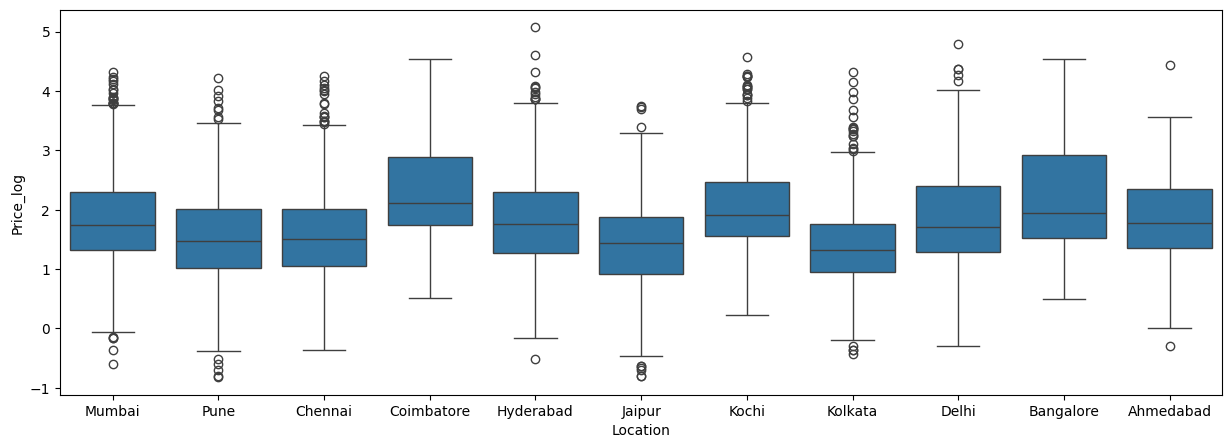

In [106]:
# Box plot for location vs Price 
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Location', y='Price_log')
plt.xlabel('Location')
plt.ylabel('Price_log')
plt.show()

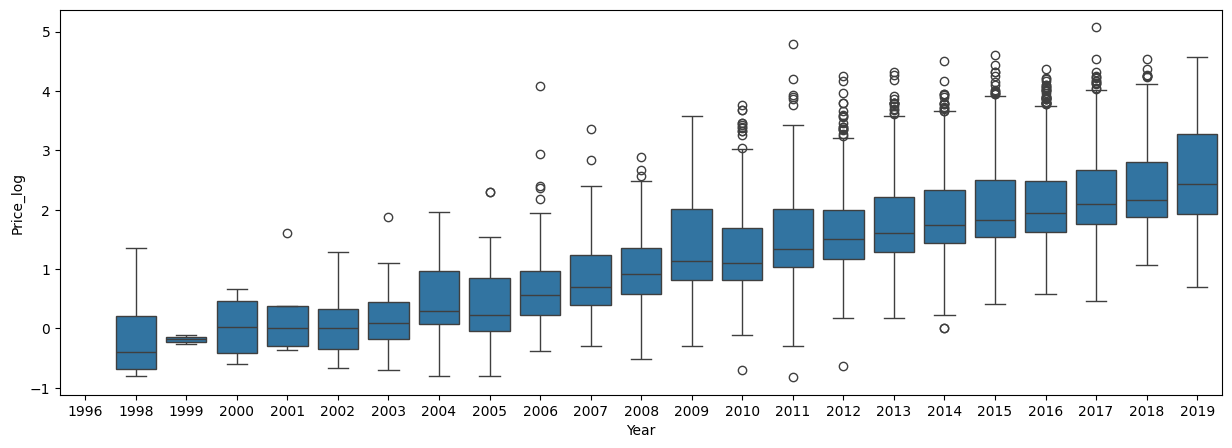

In [107]:
# Box plot for Year vs Price 
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Year', y='Price_log')
plt.xlabel('Year')
plt.ylabel('Price_log')
plt.show()

### ***Observations / Insights*** ### 

- Cars in Coimbatore and Bangalore have better prices when compared to rest other locations

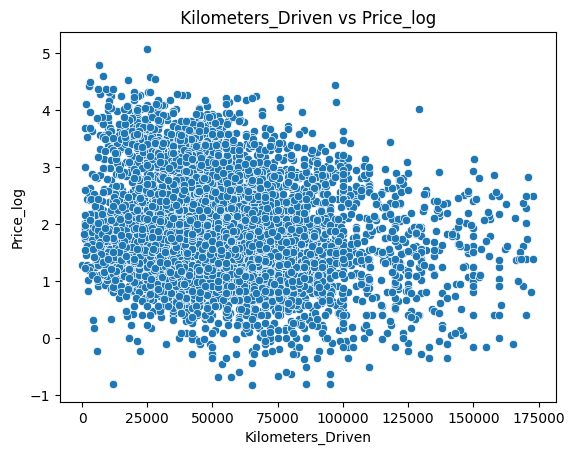

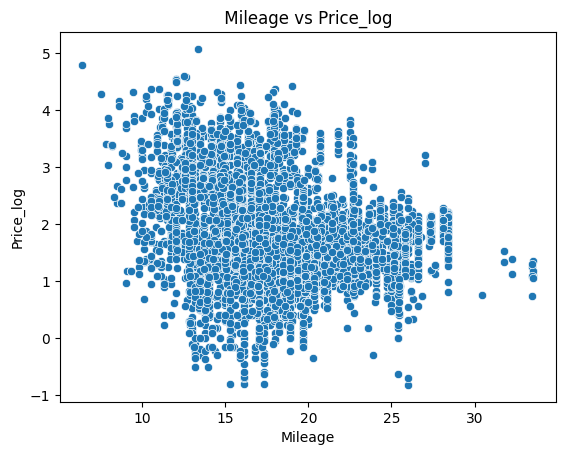

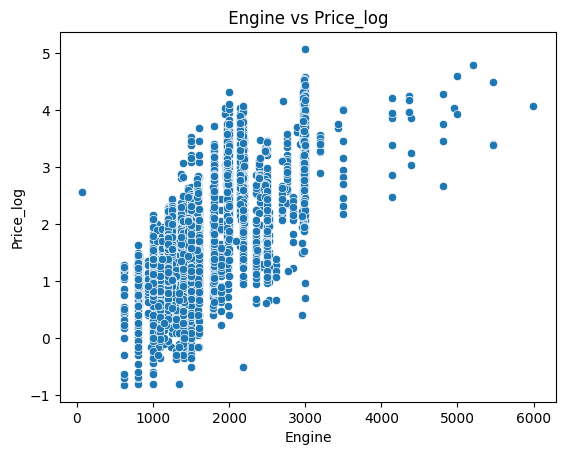

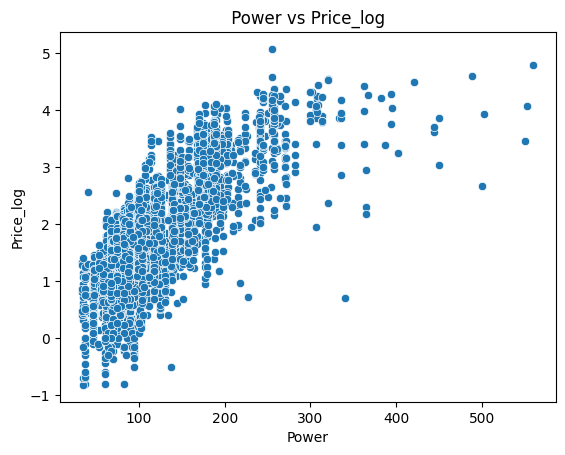

In [108]:
# scatterplot for price vs some of the key variables 
key_variables=['Kilometers_Driven','Mileage','Engine','Power']
for col in key_variables:
  plt.title(f" {col} vs Price_log ")
  sns.scatterplot(data=data, x=col, y='Price_log')
  plt.xlabel(col)
  plt.ylabel('Price_log')
  plt.show()

### ***Observations / Insights*** ### 

- Price is better for cars which have low values of kilometers_driven it also has negative trend 
- Better Mileage has good price based on the distribution 
- Prices are better for cars with good enginer capacity 
- Prices are better for cars with good power  

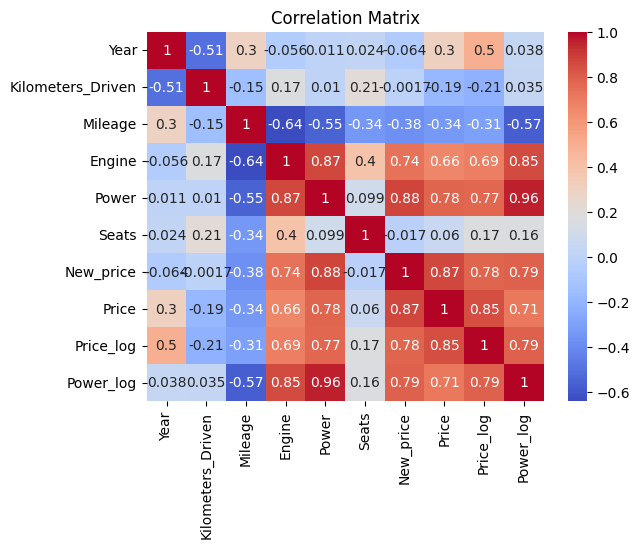

In [109]:
# Heatmap across variables 
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### ***Observations / Insights*** ### 

Based on the heatmap Year, Engine, Power, Seats have good impact on Car prices while Kilometers_Driven, Mileage have negative impact on price of the cars 

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [110]:
# Separating Brand name out of Name column
data['brand'] = data['Name'].str.split().str[0]

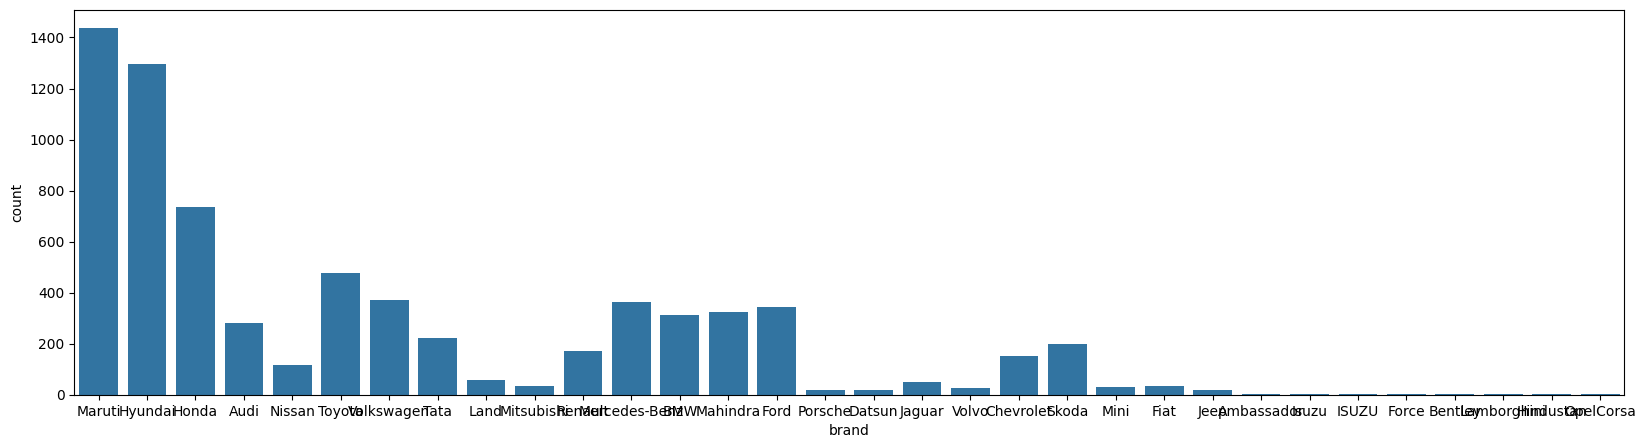

In [111]:
# Car sold based on brand 
plt.figure(figsize=(20,5))
sns.countplot(x='brand',data=data)
plt.show()

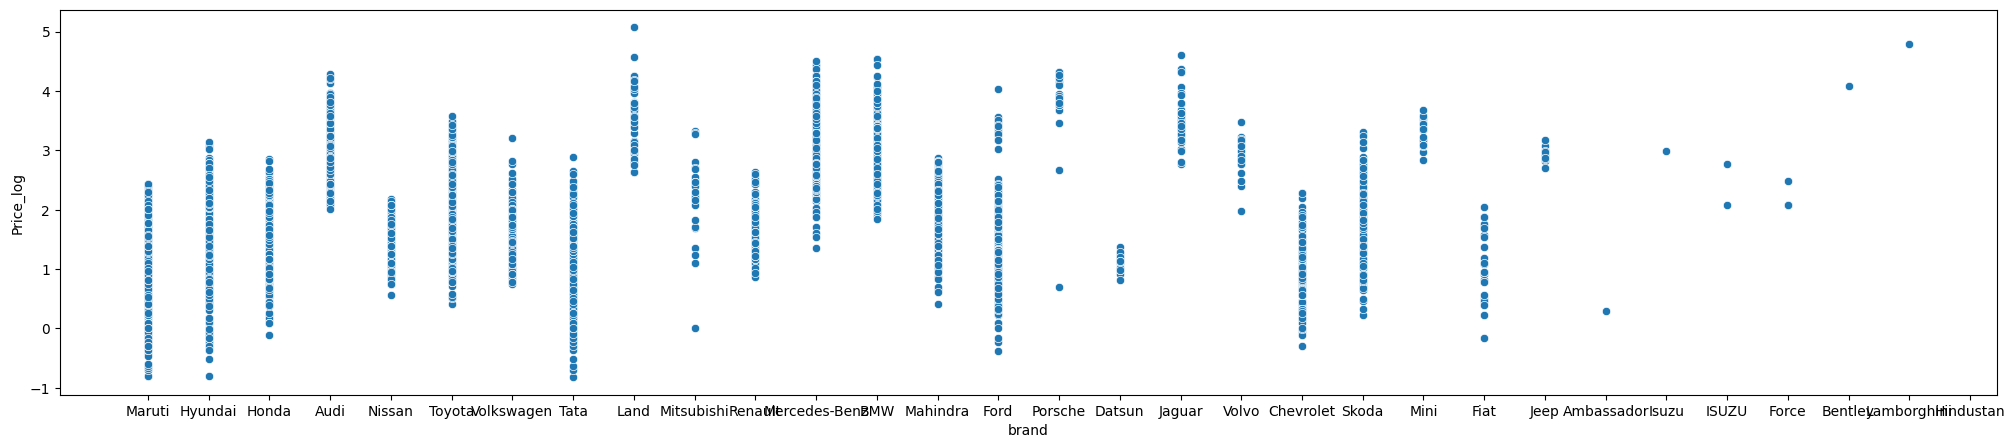

In [112]:
# Price distribution wrt Brand 
plt.figure(figsize=(25,5))
sns.scatterplot(data=data, x='brand', y='Price_log')
plt.xlabel('brand')
plt.ylabel('Price_log')
plt.show()

### ***Observations / Insights*** ### 

- Luxury car brands like Audi, Land Rover, Lamborghini have better price  
- Maruti and Hyundai brands are most popular units sold. 


### **Missing value treatment**

In [113]:
# check for null values 
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 33
Power                 128
Seats                  38
New_price            6101
Price                1207
Price_log            1207
Power_log             128
brand                   0
dtype: int64

In [114]:
data=data.dropna(subset=['Mileage','Engine','Seats','Price','Power'])

In [115]:
# Check for null after data clean up 
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            4972
Price                   0
Price_log               0
Power_log               0
brand                   0
dtype: int64

In [116]:
# Checking summary after data cleanup 
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5790,1791,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5790,11,Mumbai,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5790.0,NaN,NaN,NaN,2013.511054,3.14554,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5790.0,NaN,NaN,NaN,55417.83057,30424.137536,171.0,33004.0,52041.5,72000.0,173000.0
Fuel_Type,5790,4,Diesel,3089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5790,2,Manual,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5790,4,First,4784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5790.0,NaN,NaN,NaN,18.395133,4.180695,6.4,15.4,18.485,21.1,33.54
Engine,5790.0,NaN,NaN,NaN,1618.321244,597.430616,624.0,1198.0,1493.0,1968.0,5998.0
Power,5790.0,NaN,NaN,NaN,113.133965,53.929571,34.2,75.0,94.0,138.1,560.0


### Observations ####

I had to clean up columns which had null values as result I did lose 10-20% of data but this essential for better modeling. Replacing with median can be explored but since data is less sticking with dropping. 

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

### Observation ###

We are dropping these columns  

1. Name - It has lot of unique values which will impact our model training 
2. Price - It is our Target variable
3. Price_log - It is our log transformed target variable 
4. Kilometers_driven - values are highly skewed so we are using log transformed value column instead 

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [117]:
# Drop columns to fit the model better 
X = data.drop(columns=['Name', 'Price', 'Price_log', 'New_price', 'Kilometers_Driven','Power'], axis=1)

# Target variable
Y = data[["Price_log", "Price"]]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand'])

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Shapes of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4053, 51) (1737, 51) (4053, 2) (1737, 2)


In [118]:
from sklearn import metrics

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

In [119]:
# Apply Liner Regression  
lr = LinearRegression()
lr.fit(X_train, y_train['Price_log'])
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8931861466761185
R-square on test set :  0.8687977432598775
RMSE on training set :  3.6719065710589076
RMSE on test set :  4.031848165699797


In [120]:
# Apply Ridge Regression 

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train['Price_log'])
Ridge_score=get_model_score(ridge)


# Apply Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train['Price_log'])
Lasso_score=get_model_score(lasso)



R-sqaure on training set :  0.8855675494668778
R-square on test set :  0.8728508461260548
RMSE on training set :  3.8006023297305815
RMSE on test set :  3.9690836635434197
R-sqaure on training set :  0.15044908594879813
R-square on test set :  -0.02419654959052897
RMSE on training set :  10.355534904041765
RMSE on test set :  11.264843703341551


In [121]:
# Apply Decision Tree Regression Model 

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train['Price_log'])
get_model_score(dt)

R-sqaure on training set :  0.9989824125816772
R-square on test set :  0.7769304616867642
RMSE on training set :  0.3583964468368281
RMSE on test set :  5.257189724713713


[0.9989824125816772, 0.7769304616867642, 0.3583964468368281, 5.257189724713713]

In [122]:
# Apply Random Forest Regression Model 

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train['Price_log'])
get_model_score(rf)

R-sqaure on training set :  0.9747969377311475
R-square on test set :  0.8950591677956669
RMSE on training set :  1.7836288454678793
RMSE on test set :  3.6058343212930097


[0.9747969377311475,
 0.8950591677956669,
 1.7836288454678793,
 3.6058343212930097]

### **Hyperparameter Tuning: Decision Tree**

In [123]:
# Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train Decision Tree Regressor with best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)
dt_train_rmse = mean_squared_error(y_train, dt_train_pred, squared=False)
dt_test_rmse = mean_squared_error(y_test, dt_test_pred, squared=False)

print("Decision Tree Regression Train RMSE:", dt_train_rmse)
print("Decision Tree Regression Test RMSE:", dt_test_rmse)

# Feature importance
feature_importances = pd.DataFrame(best_dt.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Decision Tree Regression Train RMSE: 1.7393357701462526
Decision Tree Regression Test RMSE: 2.166068152069002
Feature Importances:
                            importance
Power_log                    0.705489
Year                         0.185241
Engine                       0.053539
Mileage                      0.016568
Location_Hyderabad           0.015308
Transmission_Manual          0.008940
brand_Mini                   0.003107
brand_Audi                   0.002825
Owner_Type_Second            0.001943
brand_BMW                    0.001409
brand_Mercedes-Benz          0.001131
Location_Bangalore           0.000916
Location_Coimbatore          0.000760
brand_Honda                  0.000628
Location_Kolkata             0.000443
brand_Toyota                 0.000429
Location_Mumbai              0.000261
Fuel_Type_Diesel             0.000245
brand_Tata                   0.000208
b

**Feature Importance**

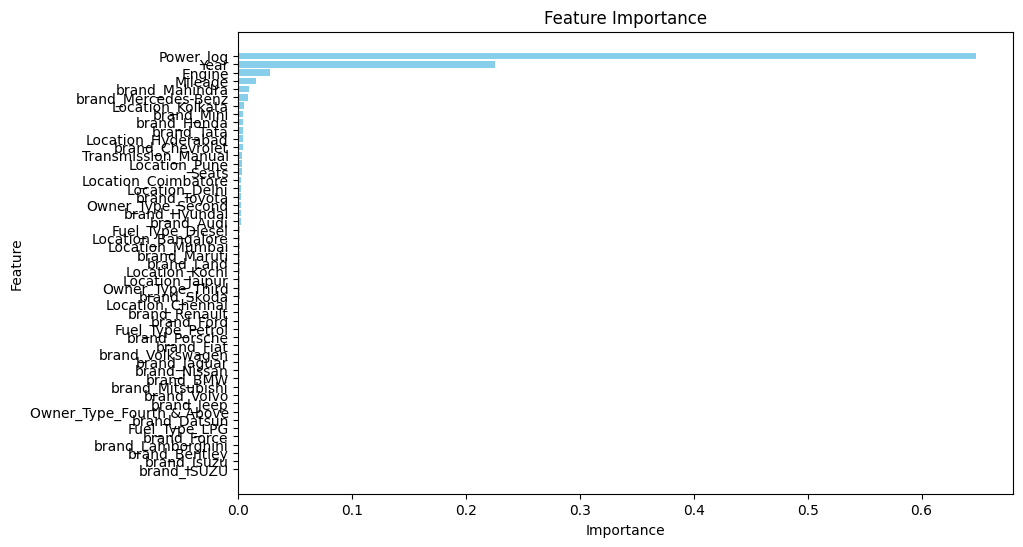

In [124]:
# Fit the model again for extracting feature importance 
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train['Price_log'])
importances = dt.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### **Hyperparameter Tuning: Random Forest**

In [125]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf = RandomForestRegressor()

# Define the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
print("Test set performance:", best_rf.score(X_test, y_test))

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test set performance: 0.9290637833938585


**Feature Importance**

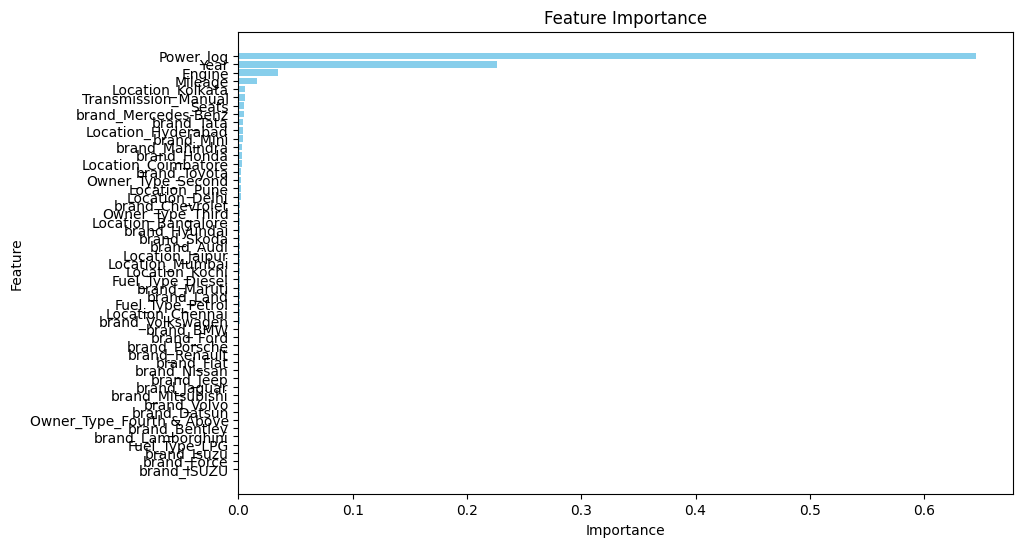

In [126]:
# Fit the model again for extracting feature importance 
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train['Price_log'])
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [127]:
# Defining list of models you have trained
models = [lr, ridge, lasso, dt, rf]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)

    r2_train.append(j[0])

    r2_test.append(j[1])

    rmse_train.append(j[2])

    rmse_test.append(j[3])
    print(j)


[0.8931861466761185, 0.8687977432598775, 3.6719065710589076, 4.031848165699797]
[0.8855675494668778, 0.8728508461260548, 3.8006023297305815, 3.9690836635434197]
[0.15044908594879813, -0.02419654959052897, 10.355534904041765, 11.264843703341551]
[0.9989824125816772, 0.7769304616867642, 0.3583964468368281, 5.257189724713713]
[0.9747969377311475, 0.8950591677956669, 1.7836288454678793, 3.6058343212930097]


In [128]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest'],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.893186,0.868798,3.671907,4.031848
1,Ridge,0.885568,0.872851,3.800602,3.969084
2,Lasso,0.150449,-0.024197,10.355535,11.264844
3,Decision Tree,0.998982,0.776930,0.358396,5.257190
4,Random Forest,0.974797,0.895059,1.783629,3.605834


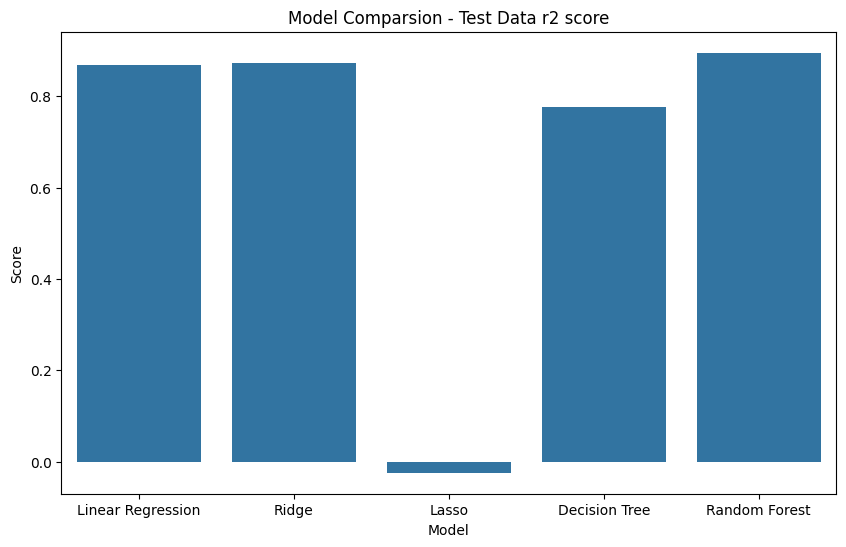

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_frame,y='Test_r2',x='Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparsion - Test Data r2 score')
plt.show()

**2. Refined insights:** 

- Power, Manufacturing Year, Engine have a strong influence on the price of the car. 
- Location and brands also have influence on the price of the car 
- As stated in the problem statement based on model we can safely say manufacture year directly impacts car prices. Relative new cars have higher prices. 

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

**Random Forest regression model would be the right model based on data and model performance. With r2 score of 0.89 and rmse of 3.6 prices wont vary much this will help Cars4U to predict the price better and have a good profit margin** 


### Recommendations

1.	***Introduce Car Categories***: Classifying vehicles into categories like luxury, budget, etc., can significantly enhance price prediction accuracy. Luxury cars typically have higher prices, which can skew median values if not properly accounted for.
2.	***Incorporate Car Types***: Differentiating between car types, such as sedans, SUVs, etc., will further improve the accuracy of price predictions by considering the specific demand and pricing trends associated with each type.
3.	***Focus on Popular Brands***: Cars4U should consider investing in brands like Maruti and Hyundai, which are particularly popular among consumers in the used car market.
4.	***Target Key Locations***: Initial business operations should focus on cities like Mumbai, Coimbatore, and Hyderabad, as these locations are identified as high-potential markets with significant consumer interest in used cars.

